In [658]:
import requests
import json
import pandas as pd
import nltk
import sklearn 
import string
import seaborn as sns
import re
import numpy as np
import matplotlib.pyplot as plt

from pprint import pprint

from html.parser import HTMLParser

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score


from textblob import TextBlob

from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

## Data Extraction 

- Pulled the latest 100 threads from the Technology, TV & Film, Food & Cooking, and Literature channels.
- Extracted the comment text,time stamps and number of replies per comment
- Parsed punctuations to actual value
- Created a dataframe for each channel

In [127]:
cook = requests.get('https://a.4cdn.org/ck/catalog.json')
tv = requests.get('https://a.4cdn.org/tv/catalog.json')
tech = requests.get('https://a.4cdn.org/g/catalog.json')
lit = requests.get('https://a.4cdn.org/lit/catalog.json')

cook = cook.json()
tv = tv.json()
tech = tech.json()
lit = lit.json()

In [111]:
#pretty print
pprint(cook)

[{'page': 1,
  'threads': [{'bumplimit': 0,
               'com': 'Do you put beans in your chili?',
               'ext': '.jpg',
               'filename': 'texas chili',
               'fsize': 48495,
               'h': 400,
               'imagelimit': 0,
               'images': 1,
               'last_modified': 1589161425,
               'last_replies': [{'com': 'im a canada fag so ive never had '
                                        '&#039;&#039;authentic&#039;&#039; '
                                        'chili. ive always had it with beans. '
                                        'if you dont put beans in it.. isnt it '
                                        'basically sloppy joes?',
                                 'name': 'Anonymous',
                                 'no': 14065251,
                                 'now': '05/10/20(Sun)18:41:27',
                                 'resto': 14063770,
                                 'time': 1589150487},
             

                                 'no': 14066162,
                                 'now': '05/10/20(Sun)21:41:33',
                                 'resto': 14058737,
                                 'time': 1589161293}],
               'md5': 'y8M9KY9SX5c3xIl0zSDqcQ==',
               'name': 'Anonymous',
               'no': 14058737,
               'now': '05/09/20(Sat)13:10:02',
               'omitted_images': 15,
               'omitted_posts': 105,
               'replies': 110,
               'resto': 0,
               'semantic_url': 'why-are-buffets-disappearing',
               'sub': 'Why are buffets disappearing?',
               'tim': 1589044202169,
               'time': 1589044202,
               'tn_h': 154,
               'tn_w': 250,
               'w': 670},
              {'bumplimit': 0,
               'com': 'I just drank an entire can of micheladas and made a pot '
                      'of potato soup.<br>Ask me anything',
               'ext': '.jpg',
         

                                 'no': 14066132,
                                 'now': '05/10/20(Sun)21:34:06',
                                 'resto': 14061740,
                                 'tim': 1589160846495,
                                 'time': 1589160846,
                                 'tn_h': 124,
                                 'tn_w': 124,
                                 'w': 580},
                                {'com': '<a href="#p14064860" '
                                        'class="quotelink">&gt;&gt;14064860</a><br>Correct',
                                 'name': 'Anonymous',
                                 'no': 14066142,
                                 'now': '05/10/20(Sun)21:37:08',
                                 'resto': 14061740,
                                 'time': 1589161028}],
               'md5': 'fQLZkLi4heya7z4Y4wg9RA==',
               'name': 'Anonymous',
               'no': 14061740,
               'now': '05/10/20(Sun)01:09

                                 'filename': 'chicken vr dystopia',
                                 'fsize': 186865,
                                 'h': 817,
                                 'md5': 'bQ3RkL1DPhi76fEM+zQ+dg==',
                                 'name': 'Anonymous',
                                 'no': 14066125,
                                 'now': '05/10/20(Sun)21:32:27',
                                 'resto': 14065607,
                                 'tim': 1589160747074,
                                 'time': 1589160747,
                                 'tn_h': 125,
                                 'tn_w': 94,
                                 'w': 619}],
               'md5': 'wKnbWzYF8Nr2Bf9dPkBUPA==',
               'name': 'no',
               'no': 14065607,
               'now': '05/10/20(Sun)20:00:07',
               'omitted_images': 3,
               'omitted_posts': 15,
               'replies': 20,
               'resto': 0,
               'seman

                                 'name': 'Anonymous',
                                 'no': 14065834,
                                 'now': '05/10/20(Sun)20:41:21',
                                 'resto': 14063095,
                                 'time': 1589157681},
                                {'com': '<span class="quote">&gt;doesn&#039;t '
                                        'cater to your sense of '
                                        'humour</span><br><span '
                                        'class="quote">&gt;has his main '
                                        'audience come from Instagram and '
                                        'tiktok</span><br><span '
                                        'class="quote">&gt;is a zoomer and '
                                        'caters to other '
                                        'zoomers</span><br><br><span '
                                        'class="quote">&gt;what a fucking '
               

                                 'name': 'Anonymous',
                                 'no': 14065979,
                                 'now': '05/10/20(Sun)21:04:30',
                                 'resto': 14064648,
                                 'tim': 1589159070037,
                                 'time': 1589159070,
                                 'tn_h': 125,
                                 'tn_w': 80,
                                 'w': 739},
                                {'com': '<a href="#p14065979" '
                                        'class="quotelink">&gt;&gt;14065979</a><br>Based',
                                 'name': 'Anonymous',
                                 'no': 14066027,
                                 'now': '05/10/20(Sun)21:12:34',
                                 'resto': 14064648,
                                 'time': 1589159554},
                                {'com': '<a href="#p14065979" '
                                        'cla

               'no': 14065006,
               'now': '05/10/20(Sun)17:46:29',
               'replies': 4,
               'resto': 0,
               'semantic_url': 'using-cooked-sauce-for-pizza-instead-of-the-raw',
               'tim': 1589147189493,
               'time': 1589147189,
               'tn_h': 250,
               'tn_w': 200,
               'w': 800},
              {'bumplimit': 0,
               'com': 'How do I know+cooking tips',
               'ext': '.jpg',
               'filename': 'MDGuzVvonvsMMjyMCNoKmq9UtEkHSQWmlIVhtMR16g-1024x768',
               'fsize': 155712,
               'h': 768,
               'imagelimit': 0,
               'images': 3,
               'last_modified': 1589159370,
               'last_replies': [{'com': '<a href="#p14062346" '
                                        'class="quotelink">&gt;&gt;14062346</a><br><span '
                                        'class="quote">&gt;how do I '
                                        'know?</s

                                 'tn_h': 125,
                                 'tn_w': 125,
                                 'w': 480},
                                {'com': '<a href="#p14064858" '
                                        'class="quotelink">&gt;&gt;14064858</a><br>That&#039;s '
                                        'real blood, dumbass.<br><a '
                                        'href="#p14064921" '
                                        'class="quotelink">&gt;&gt;14064921</a><br>There '
                                        'were no fans in attendance.',
                                 'name': 'Anonymous',
                                 'no': 14065487,
                                 'now': '05/10/20(Sun)19:30:03',
                                 'resto': 14064799,
                                 'time': 1589153403},
                                {'com': '<span class="quote">&gt;shart to '
                                        'mart</span>',
     

                                 'no': 14065729,
                                 'now': '05/10/20(Sun)20:22:50',
                                 'resto': 14065520,
                                 'time': 1589156570},
                                {'com': 'Have you tried not being a shitskin?',
                                 'name': 'Anonymous',
                                 'no': 14065868,
                                 'now': '05/10/20(Sun)20:47:40',
                                 'resto': 14065520,
                                 'time': 1589158060},
                                {'com': '<a href="#p14065697" '
                                        'class="quotelink">&gt;&gt;14065697</a><br><span '
                                        'class="quote">&gt;i went to the '
                                        'doctor and told him dairy makes me '
                                        'feel sick so was totally '
                                        'diagnosed

               'h': 500,
               'imagelimit': 0,
               'images': 0,
               'last_modified': 1589158250,
               'last_replies': [{'com': '<a href="#p14065617" '
                                        'class="quotelink">&gt;&gt;14065617</a><br>I&#039;ve '
                                        'never had a PBJ (bong).<br>Not sure '
                                        'how something so sweet + salty would '
                                        'taste, but i&#039;m curious',
                                 'name': 'Anonymous',
                                 'no': 14065674,
                                 'now': '05/10/20(Sun)20:13:59',
                                 'resto': 14065617,
                                 'time': 1589156039},
                                {'com': '<a href="#p14065674" '
                                        'class="quotelink">&gt;&gt;14065674</a><br>American '
                                        'peanutbut

                                 'time': 1589152204},
                                {'com': '<a href="#p14065380" '
                                        'class="quotelink">&gt;&gt;14065380</a><br>My '
                                        'time is way more valuable than that. '
                                        'Only got that scale because it came '
                                        'out free after aliexpress tossed me a '
                                        'few $ off an order. Got a bench/burr '
                                        'brush, a portafilter brush, and the '
                                        'scale for under $10. 2/3 of them are '
                                        'great.',
                                 'name': 'Anonymous',
                                 'no': 14065524,
                                 'now': '05/10/20(Sun)19:40:30',
                                 'resto': 14060963,
                                 'time': 1589

                                        'stinky vinegary cock and '
                                        'tits.<br>I&#039;m trans btw',
                                 'name': 'Anonymous',
                                 'no': 14064969,
                                 'now': '05/10/20(Sun)17:35:42',
                                 'resto': 14064928,
                                 'time': 1589146542},
                                {'com': '<a href="#p14064928" '
                                        'class="quotelink">&gt;&gt;14064928</a><br><span '
                                        'class="quote">&gt;yuor</span><br><span '
                                        'class="quote">&gt;are</span><br><br><span '
                                        'class="quote">&gt;FB_IMG_</span>',
                                 'ext': '.jpg',
                                 'filename': '__madotsuki_yume_nikki_drawn_by_aosora_mizore__f5753870a40ccef114a6cb88e7f48531',
             

                                        'the caffeine jew</span>',
                                 'ext': '.jpg',
                                 'filename': '1363913061505',
                                 'fsize': 17327,
                                 'h': 203,
                                 'md5': 'JL+JRrVS8RnKD4MBOiiX/Q==',
                                 'name': 'Anonymous',
                                 'no': 14065307,
                                 'now': '05/10/20(Sun)18:52:36',
                                 'resto': 14063760,
                                 'tim': 1589151156739,
                                 'time': 1589151156,
                                 'tn_h': 125,
                                 'tn_w': 111,
                                 'w': 181},
                                {'com': '<a href="#p14065307" '
                                        'class="quotelink">&gt;&gt;14065307</a><br><span '
                                        'cla

               'h': 914,
               'imagelimit': 0,
               'images': 7,
               'last_modified': 1589152228,
               'last_replies': [{'com': '<a href="#p14064168" '
                                        'class="quotelink">&gt;&gt;14064168</a><br><span '
                                        'class="quote">&gt;We reserve the '
                                        'right to refuse service to '
                                        'anyone</span><br>based racists',
                                 'name': 'Anonymous',
                                 'no': 14064815,
                                 'now': '05/10/20(Sun)17:03:49',
                                 'resto': 14063804,
                                 'time': 1589144629},
                                {'com': '<a href="#p14064206" '
                                        'class="quotelink">&gt;&gt;14064206</a><br>Holy '
                                        'shit a lake city anon. I gr

               'semantic_url': 'does-anyone-when-going-to-a-restaurant-or',
               'tim': 1589150742262,
               'time': 1589150742,
               'tn_h': 220,
               'tn_w': 250,
               'w': 654},
              {'bumplimit': 0,
               'com': 'Made a sandwich',
               'ext': '.png',
               'filename': 'sandwich',
               'fsize': 2756621,
               'h': 896,
               'imagelimit': 0,
               'images': 2,
               'last_modified': 1589151027,
               'last_replies': [{'com': '<a href="#p14062994" '
                                        'class="quotelink">&gt;&gt;14062994</a><br>Can '
                                        'I have one?',
                                 'name': 'Anonymous',
                                 'no': 14063592,
                                 'now': '05/10/20(Sun)12:50:51',
                                 'resto': 14062994,
                                 'time'

                                        'for a rimming that one time',
                                 'name': 'Anonymous',
                                 'no': 14065171,
                                 'now': '05/10/20(Sun)18:22:20',
                                 'resto': 14064207,
                                 'time': 1589149340},
                                {'com': '<a href="#p14065162" '
                                        'class="quotelink">&gt;&gt;14065162</a><br><a '
                                        'href="#p14065171" '
                                        'class="quotelink">&gt;&gt;14065171</a><br><br>wtf '
                                        'kind of slang is this',
                                 'name': 'Anonymous',
                                 'no': 14065176,
                                 'now': '05/10/20(Sun)18:23:35',
                                 'resto': 14064207,
                                 'time': 1589149415},
          

                                        'with the exception of Red Bullies. So '
                                        'feel free to discuss your preferred '
                                        '/sips/ here with your fellow sipboys '
                                        'free of hostilty.<br>Relax, and have '
                                        'a /sip/.',
                                 'ext': '.jpg',
                                 'filename': 'sipboys',
                                 'fsize': 70017,
                                 'h': 384,
                                 'md5': 'Z83GnviV7ETUv+ri9dvHuA==',
                                 'name': 'Anonymous',
                                 'no': 14063613,
                                 'now': '05/10/20(Sun)12:55:26',
                                 'resto': 14057950,
                                 'tim': 1589129726490,
                                 'time': 1589129726,
                                 'tn

               'omitted_posts': 9,
               'replies': 14,
               'resto': 0,
               'semantic_url': 'food-condom',
               'tim': 1589123602230,
               'time': 1589123602,
               'tn_h': 250,
               'tn_w': 187,
               'w': 3024},
              {'bumplimit': 0,
               'ext': '.jpg',
               'filename': 'transgnocchi',
               'fsize': 31640,
               'h': 355,
               'imagelimit': 0,
               'images': 5,
               'last_modified': 1589145524,
               'last_replies': [{'com': '<a href="#p14064104" '
                                        'class="quotelink">&gt;&gt;14064104</a><br>If '
                                        'this is true holy shit how '
                                        'efficient<br><br>Also tater tots are '
                                        '#1 for me',
                                 'name': 'Anonymous',
                                 '

               'md5': 'p23BaiUC7N1DU83GkZHh9Q==',
               'name': 'Anonymous',
               'no': 14064250,
               'now': '05/10/20(Sun)15:06:25',
               'omitted_images': 0,
               'omitted_posts': 3,
               'replies': 8,
               'resto': 0,
               'semantic_url': 'cucumbers',
               'sub': 'cucumbers',
               'tim': 1589137585413,
               'time': 1589137585,
               'tn_h': 166,
               'tn_w': 250,
               'w': 2121},
              {'bumplimit': 0,
               'com': '<span class="quote">&gt;order a deluxe '
                      'pizza</span><br><span class="quote">&gt;they murder the '
                      'thing in black olives and green peppers</span><br>Why? '
                      'Do people like this? Some is OK but the pizza is ruined '
                      'when half of every bite is these crunchy pungent '
                      'flavor-hogs',
               'ext': '.jpg

In [112]:
# Displaying keys
print(cook[0]['threads'][0].keys())

dict_keys(['no', 'now', 'name', 'com', 'filename', 'ext', 'w', 'h', 'tn_w', 'tn_h', 'tim', 'time', 'md5', 'fsize', 'resto', 'bumplimit', 'imagelimit', 'semantic_url', 'replies', 'images', 'omitted_posts', 'omitted_images', 'last_replies', 'last_modified'])


In [673]:
# extracting the comment text, timestamps, messages per thread and number of replies per comment
count  = 0
food=[]
h=HTMLParser()

for items in cook:
    ft=(len(items['threads']))
    for thread in items['threads']:
        if count == 100:
            break
        try:
            time = thread['time'] 
            food_com = h.unescape(thread['com'])
            food.append([time,food_com,thread['replies']])
            count += 1
        except:
            pass

C:\Users\kastu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning:

The unescape method is deprecated and will be removed in 3.5, use html.unescape() instead.



In [114]:
food

[[1589132105, 'Do you put beans in your chili?', 5],
 [1588991614,
  "New Steve thread for a new Steve video. What's the best and worst ration so far? <br>https://www.youtube.com/watch?v=u9W<wbr>dP-9Q2JI",
  5],
 [1589158484,
  'What long term food projects do you regret never starting during quarentine?',
  5],
 [1589156107, 'Is there anything better than a chocolate milkshake??', 5],
 [1589161229, 'Turkish', 1],
 [1589146936,
  '<span class="quote">>he wears a mask in the supermarket</span>',
  5],
 [1589152343, 'is this some good ice cream /ck/?', 5],
 [1589136488,
  'What do you call someone who sells themselves for spaghetti?',
  5],
 [1589161052,
  'Pizza topping thread?<br><br>Just ordered a Pizza with Feta, Anchovies, Old World Pepperonis and Pineapple.',
  5],
 [1589044202, "Why don't people like buffets anymore?", 5],
 [1589156560,
  'I just drank an entire can of micheladas and made a pot of potato soup.<br>Ask me anything',
  5],
 [1589151096,
  'Unironically tastes better 

In [675]:
count  = 0
film=[]
h=HTMLParser()

for items in tv:
    tt=len(items['threads'])
    for thread in items['threads']:
        if count == 100:
            break
        try:
            time = thread['time'] 
            film_com = h.unescape(thread['com'])
            film.append([time,film_com,thread['replies']])
            count += 1
        except:
            pass

C:\Users\kastu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning:

The unescape method is deprecated and will be removed in 3.5, use html.unescape() instead.



In [676]:
count  = 0
techno=[]
h=HTMLParser()

for items in tech:
    techt= len(items['threads'])
    for thread in items['threads']:
        if count == 100:
            break
        try:
            time = thread['time'] 
            tech_com = h.unescape(thread['com'])
            techno.append([time,tech_com,thread['replies']])
            count += 1
        except:
            pass

C:\Users\kastu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning:

The unescape method is deprecated and will be removed in 3.5, use html.unescape() instead.



In [677]:
count  = 0
literature=[]
h=HTMLParser()

for items in lit:
    lt=(len(items['threads']))
    for thread in items['threads']:
        if count == 100:
            break
        try:
            time = thread['time'] 
            lit_com = h.unescape(thread['com'])
            literature.append([time,lit_com,thread['replies']])
            count += 1
        except:
            pass

C:\Users\kastu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning:

The unescape method is deprecated and will be removed in 3.5, use html.unescape() instead.



Adding the extracted data as columns of Dataframes for the 4 channels

In [678]:
cook_df=pd.DataFrame(food,columns=['time','comments','len'])
cook_df.head()

,time,comments,len
0,1589138579,Society would be better off if McDonalds and o...,36
1,1589151096,Unironically tastes better than bacon<br>t. no...,21
2,1589159163,"<span class=""quote"">>eating raw eggs is danger...",3
3,1589132105,Do you put beans in your chili?,12
4,1588991614,New Steve thread for a new Steve video. What's...,80


In [679]:
tv_df=pd.DataFrame(film,columns=['time','comments','len'])
tv_df.head()

,time,comments,len
0,1589158820,Did they do it because he mentioned the droid ...,4
1,1589158061,"<span class=""quote"">>Little girl fight Nazis</...",41
2,1589158017,"Post faery films, nymphs etc",9
3,1589157409,Kino Bean is BACK<br>https://youtu.be/9pN_x3qk56c,8
4,1589161373,OH HEIL HITLER BITCH,2


In [680]:
tech_df=pd.DataFrame(techno,columns=['time','comments','len'])
tech_df.head()

,time,comments,len
0,1450659832,"The /g/ Wiki:<br><a href=""http://wiki.installg...",1
1,1589161507,"We value your privacy. Now give us your data, ...",0
2,1589140327,Use after move edition<br><br>Previous <a href...,186
3,1589078280,prove me wrong,166
4,1589161475,Is there any software like foobar2000 for macs...,0


In [681]:
lit_df=pd.DataFrame(literature,columns=['time','comments','len'])
lit_df.head()

,time,comments,len
0,1539537990,"/lit/ is for the discussion of literature, spe...",0
1,1589141627,Why can’t /lit/ solve this?,52
2,1589155826,I can't believe no one ever talks about neopla...,25
3,1589161431,Why do authors love suicide so much?,1
4,1589155666,"<span class=""quote"">>Heavier objects fall fast...",33


## Data Cleaning
- Converted all words to lower text
- Removed urls
- Removed unnecesary punctuations
- Split words at '-'
- Tokenized on whitespace
- Performed lemmetization
- Performed pos_tagging
- Removed stopwords

In [682]:
def data_cleaning(text, lemmatizer=nltk.stem.wordnet.WordNetLemmatizer()):
    stop_words = set(stopwords.words('english')) 
    lt=[]
    lower_text = text.lower()
    reg=re.sub(r"(\w+)'s", r'\1', lower_text)
    reg=reg.replace("'", "")
    reg=reg.replace("-"," ")
    reg = reg.replace('<br>'," ")
    reg = reg.replace('</br>'," ")
    reg=reg.replace('/g/',"")
    reg=reg.replace("span"," ")
    reg=reg.replace("class"," ")
    reg=reg.replace("quote"," ")

    reg=reg.replace('<span class="quote">>','')
    reg1=re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', reg) #removing url
    punc=str.maketrans(string.punctuation,32*" ")
    pt=reg1.translate(punc)
    tokens=nltk.word_tokenize(pt)
    filtered_token = [t for t in tokens if not t in stop_words] 
    ps=nltk.pos_tag(filtered_token)
    posMapping = {
    "N":'n',
    "V":'v',
    "J":'a',
    "R":'r'
    }
    for word in ps:
        if word[1][0] in posMapping:
            lemmatized_word = lemmatizer.lemmatize(word[0],pos=posMapping[word[1][0]])
        else:
            lemmatized_word = lemmatizer.lemmatize(word[0],pos='n')
        lt.append(str(lemmatized_word))
    return lt

In [683]:
def process_all(df, lemmatizer=nltk.stem.wordnet.WordNetLemmatizer()):
    p=[]
    for val in df['comments']:
        p.append(data_cleaning(val,lemmatizer))
    df['comments']=p
    
    return df

Applying Data Cleaning on all the dataframes

In [684]:
processed_cook = process_all(cook_df)
processed_cook.head()

,time,comments,len
0,1589138579,"[society, would, better, mcdonalds, fast, food...",36
1,1589151096,"[unironically, taste, well, bacon, vegetarian]",21
2,1589159163,"[eat, raw, egg, dangerous]",3
3,1589132105,"[put, bean, chili]",12
4,1588991614,"[new, steve, thread, new, steve, video, best, ...",80


In [688]:
processed_tv = process_all(tv_df)

In [689]:
processed_tech = process_all(tech_df)

In [690]:
processed_lit = process_all(lit_df)

In [691]:
def token_function(docs):
    return docs

## Data Preprocessing and Preparation
Preparing data to draw insights and classify channels based on words
- Added class labels to each channel (0 - food and cooking, 1- film and television, 2- technology, 3- literature)
- Combined the dataframes to a single dataframe 
- Dropped the len column
- tf-idf vectorizer to vectorize the tf-idf scores to pass those as training features to classify a comment as a channel

Adding class labels to dataframes for classification

In [692]:
class_cook=[0]*100
processed_cook['class']=class_cook

In [693]:
processed_cook.head()

,time,comments,len,class
0,1589138579,"[society, would, better, mcdonalds, fast, food...",36,0
1,1589151096,"[unironically, taste, well, bacon, vegetarian]",21,0
2,1589159163,"[eat, raw, egg, dangerous]",3,0
3,1589132105,"[put, bean, chili]",12,0
4,1588991614,"[new, steve, thread, new, steve, video, best, ...",80,0


In [694]:
class_tv=[1]*100
processed_tv['class']=class_tv

In [695]:
class_tech=[2]*100
processed_tech['class']=class_tech

In [697]:
class_lit=[3]*100
processed_lit['class']=class_lit

Combining dataframes

In [393]:
frames = [processed_cook,processed_tv,processed_tech, processed_lit]
result = pd.concat(frames)

In [394]:
result = result.sample(frac=1).reset_index(drop=True) #Shuffling the rows in the dataframe for train-test split
result = result.drop(columns=['len']) #Dropping the length of replies column
result.head()

,time,comments,class
0,1588943340,"[csg, discus, cheap, shit, see, gearbest, taob...",2
1,1589156437,"[read, codebase, much, huge, knowing, language...",2
2,1589158474,"[book, shouldnt, work]",3
3,1589119475,"[happen, thread, font, render, someone, get, t...",2
4,1589150871,"[steak, fry, good, salad, need, work, everybod...",0


### Tf-idf vectorization
Calculated the term frequency-inverse document frequency scores and created a vector of these to pass as the input to the classification algorithm to classify channels based on words

In [395]:
def create_features(result):
    vectorizer = TfidfVectorizer(min_df=2, tokenizer=token_function,lowercase= False)
    X = vectorizer.fit_transform(result)
    return vectorizer, X

In [396]:
result.head()

,time,comments,class
0,1588943340,"[csg, discus, cheap, shit, see, gearbest, taob...",2
1,1589156437,"[read, codebase, much, huge, knowing, language...",2
2,1589158474,"[book, shouldnt, work]",3
3,1589119475,"[happen, thread, font, render, someone, get, t...",2
4,1589150871,"[steak, fry, good, salad, need, work, everybod...",0


In [397]:
test_comments=result.iloc[:120,1]
train_comments=result.iloc[120:,1]
test_labels=result.iloc[:120,2]
train_labels=result.iloc[120:,2]

tfidf, train_features = create_features(train_comments) #training features

## Exploratory Analysis
For each of the four channels, the following insights were drawn:
1. Analyzed the most frequently occuring words in each channel - found and plotted the 7 most frequently occuring words
2. Calculated the total number of words in each channel and the occurence of the words "good", "bad" and "covid"
3. Explored the polarity of comments and plotted a histogram to show polarity distribution for each channel
4. Displayed one random review with positive polarity
5. Calculated the messages per thread
6. Found the mean number of replies for comments in a channel

## Food and Cooking channel insights

### Insight 1 
Finding the most frequently occuring 7 words

In [645]:
text = [comment for comment in cook_df['comments']]
# print(text)
t2 = []
counter=0
for t in text:
    for i in t:
        t2.append(i)
        counter+=1
fdist1 = FreqDist(t2)
good=t2.count("good")
bad=t2.count("bad")
covid=t2.count("covid")

In [400]:
f=fdist1.most_common(7)
print("The 7 most frequently occuring words are:",f)

The 7 most frequently occuring words are: [('make', 21), ('food', 20), ('good', 13), ('like', 13), ('taste', 11), ('cook', 11), ('cheese', 10)]


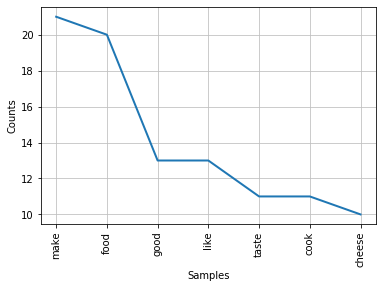

In [401]:
# Plot of most frequently occuring words along with their frequency of occurence 
fdist1.plot(7)

### Insight 2
- Finding the total number of words
- Finding the occurence of the words "good"and "bad" to see how frequently these words are used and if they are correlated with polarity
- Finding the frequency of the word "covid" in light of the recent events

In [646]:
print("The total number of words in food and cooking are : ", counter)
print("The frequency of occurence of the word 'good' is : ",good)
print("The frequency of occurence of the word 'bad' is : ", bad)
print("The frequency of occurence of the word 'covid' is : ", covid)

The total number of words in food and cooking are :  1192
The frequency of occurence of the word 'good' is :  13
The frequency of occurence of the word 'bad' is :  1
The frequency of occurence of the word 'covid' is :  2


### Insight 3
Calculating the polarity of each comment, finding the mean polarity and plotting a histogram

In [627]:
cook_df['polarity'] = cook_df['comments'].map(lambda text: TextBlob(" ".join(text)).sentiment.polarity)  

In [628]:
cook_df

,time,comments,len,class,polarity
0,1589138579,"[society, would, better, mcdonalds, fast, food...",5,0,0.182857
1,1589151096,"[unironically, taste, well, bacon, vegetarian]",5,0,0.000000
2,1589159163,"[eat, raw, egg, dangerous]",3,0,-0.415385
3,1589132105,"[put, bean, chili]",5,0,0.000000
4,1588991614,"[new, steve, thread, new, steve, video, best, ...",5,0,0.134545
...,...,...,...,...,...
95,1589152665,"[instant, coffee, regular, coffee, taste, diff...",5,0,0.061667
96,1589132011,"[green, monster, ultra, good]",5,0,0.250000
97,1589152820,"[clean, kitchen, like, masterchef]",5,0,0.366667
98,1589136763,"[start, make, good, ramen, ’, add, egg, scalli...",5,0,0.700000


Text(0.5, 1.0, 'Polarity distribution for the food and cooking channel')

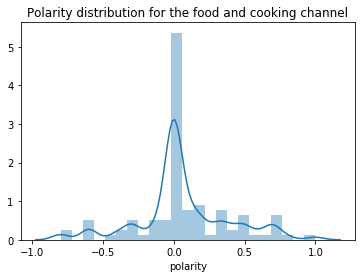

In [629]:
dp=sns.distplot(cook_df['polarity'])
plt.title("Polarity distribution for the food and cooking channel")

In [407]:
mp=cook_df[['polarity']].mean()
print("The mean polarity of food & cooking channel is : ", mp)

The mean polarity of food & cooking channel is :  polarity    0.064963
dtype: float64


In [414]:
print('1 review with the positive polarity: \n')
cl = cook_df.loc[cook_df['polarity'] == 0.5, ['comments']].sample(1).values
for c in cl:
    print(c[0])

1 review with the positive polarity: 

['ck', 'feel', 'frozen', 'food', 'pic', 'relate', 'favorite', 'frozen', 'food', 'moment']


### Insight 4
Finding the messages per thread

In [415]:
print("Number of messages in food and cooking thread are: ", ft)

Number of messages in food and cooking thread are:  15


Mean number of replies to message in the food and cooking channel

In [698]:
m=cook_df.len.mean()
print("The mean length of replies for comments in the food & cooking channel is : ",m)

The mean length of replies for comments in the food & cooking channel is :  37.97


## TV and Film channel insights

In [639]:
text = [comment for comment in tv_df['comments']]
# print(text)
t2 = []
counter_t=0
for t in text:
    for i in t:
        t2.append(i)
        counter_t+=1
fdist1 = FreqDist(t2)
good=t2.count("good")
bad=t2.count("bad")
covid=t2.count("covid")

In [608]:
f=fdist1.most_common(7)
print("The 7 most frequently occuring words are:",f)

The 7 most frequently occuring words are: [('film', 13), ('tv', 10), ('make', 10), ('movie', 9), ('think', 8), ('good', 7), ('say', 7)]


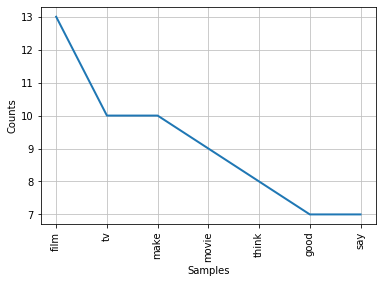

In [609]:
fdist1.plot(7)

In [640]:
print("The total number of words : ", counter_t)
print("The frequency of occurence of the word 'good' is : ",good)
print("The frequency of occurence of the word 'bad' is : ", bad)
print("The frequency of occurence of the word 'covid' is : ", covid)

The total number of words :  775
The frequency of occurence of the word 'good' is :  7
The frequency of occurence of the word 'bad' is :  2
The frequency of occurence of the word 'covid' is :  0


In [632]:
tv_df['polarity'] = tv_df['comments'].map(lambda text: TextBlob(" ".join(text)).sentiment.polarity)

Text(0.5, 1.0, 'Polarity distribution for the film & tv channel')

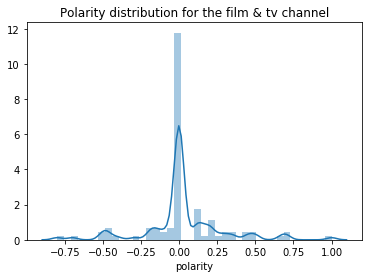

In [633]:
dp=sns.distplot(tv_df['polarity'])
plt.title("Polarity distribution for the film & tv channel")

In [613]:
mp=tv_df[['polarity']].mean()
print("The mean polarity of film & tv channel is : ", mp)

The mean polarity of film & tv channel is :  polarity    0.025855
dtype: float64


In [435]:
print('1 review with the positive polarity: \n')
cl = tv_df.loc[cook_df['polarity'] == 0.5, ['comments']].sample(1).values
for c in cl:
    print(c[0])

1 review with the positive polarity: 

['watch', 'film', 'hobby']


In [699]:
print("Number of messages in film and tv thread are: ", tt)
m=tv_df.len.mean()
print("The mean length of replies for comments in the film & tv is : ",m)

Number of messages in film and tv thread are:  13
The mean length of replies for comments in the film & tv is :  39.85


## Technology channel insights

In [637]:
text = [comment for comment in tech_df['comments']]
t2 = []
counter_tc=0
for t in text:
    for i in t:
        t2.append(i)
        counter_tc+=1
fdist1 = FreqDist(t2)
good=t2.count("good")
bad=t2.count("bad")
covid=t2.count("covid")

In [615]:
f=fdist1.most_common(7)
print("The 7 most frequently occuring words are:",f)

The 7 most frequently occuring words are: [('use', 36), ('href', 35), ('thread', 30), ('link', 27), ('get', 27), ('linux', 25), ('software', 21)]


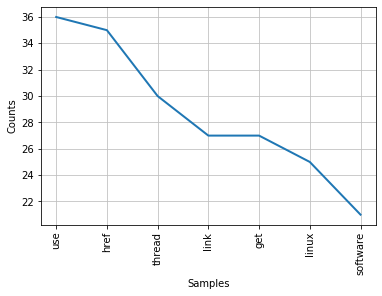

In [543]:
fdist1.plot(7)

In [638]:
print("The total number of words are : ", counter_tc)
print("The frequency of occurence of the word 'good' is : ",good)
print("The frequency of occurence of the word 'bad' is : ", bad)
print("The frequency of occurence of the word 'covid' is : ", covid)

The total number of words are :  3464
The frequency of occurence of the word 'good' is :  13
The frequency of occurence of the word 'bad' is :  1
The frequency of occurence of the word 'covid' is :  1


In [622]:
tech_df['polarity'] = tech_df['comments'].map(lambda text: TextBlob(" ".join(text)).sentiment.polarity)

Text(0.5, 1.0, 'Polarity distribution for the technology channel')

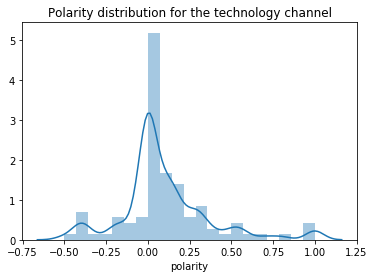

In [630]:
dp=sns.distplot(tech_df['polarity'])
plt.title("Polarity distribution for the technology channel")

In [455]:
print('1 review with the positive polarity: \n')
cl = tech_df.loc[cook_df['polarity'] == 0.6, ['comments']].sample(1).values
for c in cl:
    print(c[0])

1 review with the positive polarity: 

['best', 'firefox', 'fork']


In [565]:
mp=tech_df[['polarity']].mean()
print("The mean polarity of technology channel is : ", mp)

The mean polarity of technology channel is :  polarity    0.098935
dtype: float64


In [700]:
print("Number of messages in technology thread are: ", techt)
m=tech_df.len.mean()
print("The mean length of replies for comments in the technology channel is : ",m)

Number of messages in technology thread are:  1
The mean length of replies for comments in the technology channel is :  60.93


## Literature channel insights

In [635]:
text = [comment for comment in lit_df['comments']]
t2 = []
counter_l=0
for t in text:
    for i in t:
        t2.append(i)
        counter_l+=1
fdist1 = FreqDist(t2)
good=t2.count("good")
bad=t2.count("bad")
covid=t2.count("covid")

In [604]:
f=fdist1.most_common(7)
print("The 7 most frequently occuring words are:",f)

The 7 most frequently occuring words are: [('like', 28), ('book', 26), ('read', 22), ('time', 15), ('thing', 15), ('one', 14), ('feel', 13)]


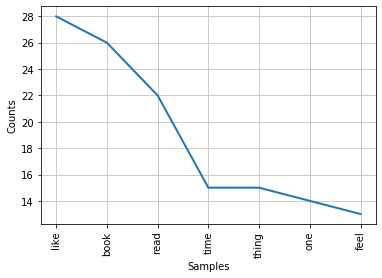

In [570]:
fdist1.plot(7)

In [636]:
print("The total number of words are : ", counter_l)
print("The frequency of occurence of the word 'good' is : ",good)
print("The frequency of occurence of the word 'bad' is : ", bad)
print("The frequency of occurence of the word 'covid' is : ", covid)

The total number of words are :  2007
The frequency of occurence of the word 'good' is :  8
The frequency of occurence of the word 'bad' is :  3
The frequency of occurence of the word 'covid' is :  0


Text(0.5, 1.0, 'Polarity distribution for the literature channel')

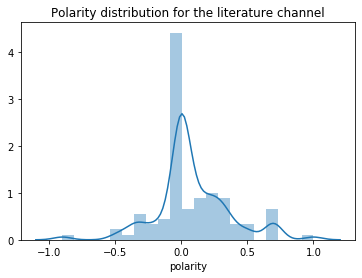

In [631]:
lit_df['polarity'] = lit_df['comments'].map(lambda text: TextBlob(" ".join(text)).sentiment.polarity)
dp=sns.distplot(lit_df['polarity'])
plt.title("Polarity distribution for the literature channel")

In [466]:
print('1 review with the positive polarity: \n')
cl = lit_df.loc[cook_df['polarity'] == 0.7, ['comments']].sample(1).values
for c in cl:
    print(c[0])

1 review with the positive polarity: 

['reason', 'great', 'literature', 'produce', 'past', 'thirty', 'year', 'comfy', 'insulated', 'insular', 'life', 'prevent', 'u', 'see', 'tragedy', 'comedy', 'shakespearean', 'scale']


In [574]:
mp=lit_df[['polarity']].mean()
print("The mean polarity of literature channel is : ", mp)

The mean polarity of literature channel is :  polarity    0.084582
dtype: float64


In [701]:
print("Number of messages in literature thread are: ", lt)
m=lit_df.len.mean()
print("The mean length of replies for comments in the literature channel is : ",m)

Number of messages in literature thread are:  13
The mean length of replies for comments in the literature channel is :  32.65


Text(0.5, 1.0, 'Total number of words per channel')

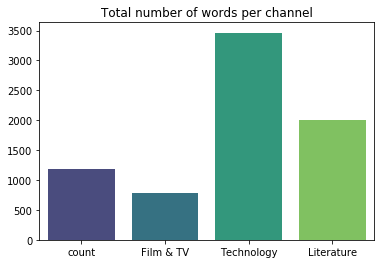

In [702]:
x=['count','Film & TV','Technology','Literature']
y=[counter,counter_t,counter_tc,counter_l]
sns.barplot(x=x, y=y,palette='viridis' )
plt.title("Total number of words per channel")

### Conclusions exploratory analysis:

From the insights above, it can be concluded that: 
1. People use more words in comments on the technology channel: The technology channel has the highest word count of 3464 words in the latest 100 comments
2. People use the least number of words to comment on films and tv channel - The film & tv channel has a significantly low word count of 775
3. The comments are inclined towards a slightly positive sentiment - all the channels have a slightly positive mean polarity( between 0 and 1)
4. The word good alone is not indicative of positive polarity- the occurence of the word good is maximum in food channel but the highest polarity is present in literature channel
5. The word "make" is not a good channel discriminating word- Make is the most commonly occuring word in the food channel and is also in the top 5 in the film & tv channel. This makes it a bad choice for discriminating between channels.
6. The literature channel has the highest mean positive polarity
7. The film and tv channel has the lowest mean positive polarity
8. About 40 people on an average would reply to  comments on any channel except the technology channel: the replies to technology channel is much higher, with a mean of 60.9
9. People haven't talked much about covid-19 on any of the 4 channels: There are hardly 1 or 2 mentions of the word in each channel

### Discriminative Analysis

It is necessary to find of the most frequently occuring words are good discriminators. Visual inspection alone is not enough. Thus, I am finding the presence of 3 best words  from the most frequent 7 words that I feel can best distinguish each channel.
Frequency of occurence is alone not sufficient. It is necessary to find if there is an overlap in the words in different channels.

Checked the occurence of the most frequent words for all channels in other channels to find the distinguishing words for each channel
1. Food & Cooking channel - food , cook, tasty, cheese
2. Film & TV - film, movie, tv
3. Technology - link,linux,software
4. Literature -book,read,thing

In [592]:
#Presence of words from food channel in all the channels
text = [comment for comment in tv_df['comments']]
t2 = []
for t in text:
    for i in t:
        t2.append(i)
print("Instances of cook in tv:",t2.count('cook'))
print("Instances of food in tv:",t2.count('food'))
print("Instances of cheese in tv:",t2.count('cheese'))
print("Instances of tasty in tv:",t2.count('tasty'))
print("\n")

text = [comment for comment in tech_df['comments']]
t2 = []
for t in text:
    for i in t:
        t2.append(i)
print("Instances of cook in technology:",t2.count('cook'))
print("Instances of food in technology:",t2.count('food'))
print("Instances of cheese in technology:",t2.count('cheese'))
print("Instances of tasty in technology:",t2.count('tasty'))
print("\n")
text = [comment for comment in lit_df['comments']]
t2 = []
for t in text:
    for i in t:
        t2.append(i)
print("Instances of cook in literature:",t2.count('cook'))
print("Instances of food in literature:",t2.count('food'))
print("Instances of cheese in literature:",t2.count('cheese'))
print("Instances of tasty in literature:",t2.count('tasty'))

Instances of cook in tv: 0
Instances of food in tv: 1
Instances of cheese in tv: 0
Instances of tasty in tv: 0


Instances of cook in technology: 1
Instances of food in technology: 0
Instances of cheese in technology: 0
Instances of tasty in technology: 0


Instances of cook in literature: 0
Instances of food in literature: 0
Instances of cheese in literature: 0
Instances of tasty in literature: 0


In [634]:
#Presence of words from tv channel in all the channels
text = [comment for comment in cook_df['comments']]
t2 = []
for t in text:
    for i in t:
        t2.append(i)
print("Instances of film in food and cooking:",t2.count('film'))
print("Instances of movie in food and cooking:",t2.count('movie'))
print("Instances of tv in food and cooking:",t2.count('tv'))
print("\n")

text = [comment for comment in tech_df['comments']]
t2 = []
for t in text:
    for i in t:
        t2.append(i)
print("Instances of film in technology:",t2.count('film'))
print("Instances of movie in technology:",t2.count('movie'))
print("Instances of tv in technology:",t2.count('tv'))
print("\n")
text = [comment for comment in lit_df['comments']]
t2 = []
for t in text:
    for i in t:
        t2.append(i)
print("Instances of film in literature:",t2.count('film'))
print("Instances of movie in literature:",t2.count('movie'))
print("Instances of tv in literature:",t2.count('tv'))

Instances of film in food and cooking: 0
Instances of movie in food and cooking: 0
Instances of tv in food and cooking: 0


Instances of film in technology: 0
Instances of movie in technology: 0
Instances of tv in technology: 1


Instances of film in literature: 0
Instances of movie in literature: 0
Instances of tv in literature: 0


In [594]:
#Presence of words from technology channel in all the channels
text = [comment for comment in cook_df['comments']]
t2 = []
for t in text:
    for i in t:
        t2.append(i)
print("Instances of linux in food and cooking:",t2.count('linux'))
print("Instances of software in food and cooking:",t2.count('software'))
print("Instances of link  in food and cooking:",t2.count( 'link '))

print("\n")

text = [comment for comment in tv_df['comments']]
t2 = []
for t in text:
    for i in t:
        t2.append(i)
print("Instances of linux in film and tv:",t2.count('linux'))
print("Instances of software in film and tv:",t2.count('software'))
print("Instances of link  in film and tv:",t2.count( 'link '))
print("\n")
text = [comment for comment in lit_df['comments']]
t2 = []
for t in text:
    for i in t:
        t2.append(i)
print("Instances of linux in literature:",t2.count('linux'))
print("Instances of software in literature:",t2.count('software'))
print("Instances of link in literature:",t2.count( 'link '))


Instances of linux in food and cooking: 0
Instances of software in food and cooking: 0
Instances of link  in food and cooking: 0


Instances of linux in film and tv: 0
Instances of software in film and tv: 0
Instances of link  in film and tv: 0


Instances of linux in literature: 0
Instances of software in literature: 0
Instances of link in literature: 0


In [606]:
#Presence of words from literature channel in all the channels
text = [comment for comment in cook_df['comments']]
t2 = []
for t in text:
    for i in t:
        t2.append(i)
print("Instances of read in food and cooking:",t2.count('read'))
print("Instances of book in food and cooking:",t2.count('book'))
print("Instances of thing  in food and cooking:",t2.count( 'thing'))

print("\n")

text = [comment for comment in tv_df['comments']]
t2 = []
for t in text:
    for i in t:
        t2.append(i)
print("Instances of read in film and tv:",t2.count('read'))
print("Instances of book in film and tv:",t2.count('book'))
print("Instances of thing  in film and tv:",t2.count( 'thing '))
print("\n")
text = [comment for comment in tech_df['comments']]
t2 = []
for t in text:
    for i in t:
        t2.append(i)
print("Instances of read in technology:",t2.count('read'))
print("Instances of book in technology:",t2.count('book'))
print("Instances of thing in technology:",t2.count( 'thing'))

Instances of read in food and cooking: 0
Instances of book in food and cooking: 0
Instances of thing  in food and cooking: 2


Instances of read in film and tv: 0
Instances of book in film and tv: 0
Instances of thing  in film and tv: 0


Instances of read in technology: 5
Instances of book in technology: 2
Instances of thing in technology: 3


From the above discriminative analysis, it can be concluded that:
1. Food channel - "Tasty" and "cheese" are the best distinguishing words, followed by cook and food for this channel
2. Film & tv channel - "Film" and movie are the best distinguishing words, followed by tv for this channel
3. Technology channel- "Linux", "software" and "link" are the best distinguishing words for this channel
4. Literature- "Book" is the best distinguishing word for this channel, followed by "read", followed by "thing".

The **technology channel** is the **easiest to distinguish** looking at the most frequently occuring words as it has technical jargon, while the **literature channel** is the most **difficult to distinguish** ,as the most frequent and best distinguishing words in this channel overlap with the technology channel

## Classification

Predicting the channel based on comments.
The tf-idf score is used as the feature vector and the labels that I appended to the dataframe for each channel are used as labels.
I have implemented two classification algorithms on this data -
- Support Vector Machine Classifier 
- Multinomial Naive Bayes Classifier

I chose SVM as it is a good algorithm for multiclass classification and Multinomial Naive Bayes as it is a good algorithm to work with text data and a small dataset

In [469]:
test_features = tfidf.transform(test_comments)

### Support Vector Machine Classifier

In [514]:
clf = SVC(kernel='linear',gamma='auto',C=0.7)
clf.fit(train_features, train_labels)

SVC(C=0.7, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Train accuracy

In [515]:
pred=clf.predict(train_features)
print(accuracy_score(train_labels,pred))

0.9214285714285714


Test accuracy

In [516]:
preds=clf.predict(test_features)
print(accuracy_score(test_labels,preds))

0.6333333333333333


### Multinomial Naive Bayes Classifier

In [526]:
n_clf=MultinomialNB(alpha=2)
n_clf.fit(train_features, train_labels)

MultinomialNB(alpha=2, class_prior=None, fit_prior=True)

In [ ]:
Train accuracy

In [527]:
pred=n_clf.predict(train_features)
print(accuracy_score(train_labels,pred))

0.925


In [ ]:
Test accuracy

In [528]:
preds=n_clf.predict(test_features)
print(accuracy_score(test_labels,preds))

0.6416666666666667


### Inferences
Multinomial Naive Bayes classifier outperforms SVM classifier.

Both SVM and Naive Bayes algorithm are overfitting on the data, as the train accuracy is high but the test accuracy is very low. This could be because of the presence of overlapping words and mainly because the dataset is small. 

Dataframe showing the comment, predicted label and the test label for Multinomial Naive Bayes classifier

In [539]:
table = []
for i in range(len(test_comments)):
    table.append([test_comments[i],test_labels[i],preds[i]])
test_pd = pd.DataFrame(table,columns=['test data','test label','pred label'])
print(test_pd)

                                             test data  test label  pred label
0    [csg, discus, cheap, shit, see, gearbest, taob...           2           2
1    [read, codebase, much, huge, knowing, language...           2           2
2                               [book, shouldnt, work]           3           3
3    [happen, thread, font, render, someone, get, t...           2           2
4    [steak, fry, good, salad, need, work, everybod...           0           0
..                                                 ...         ...         ...
115                                    [fuck, problem]           2           1
116  [mark, wiens, travel, 2, time, per, week, exot...           0           0
117  [would, call, period, live, 90, current, day, ...           3           3
118  [purely, philosophical, standpoint, pedophilia...           3           3
119  [notepad, foobar2000, everything, soulseekqt, ...           2           2

[120 rows x 3 columns]


F-1 score for the test data

In [664]:
f1_score(test_labels, preds,average='weighted')

0.6481348727380432

Performance metrics evaluation:

From the accuracies and F-1 score, it can be seen that it is difficult to classify the data into these 4 channels with 100 comments. Increasing the comments pulled, could help increase the performance of the model.

### Coclusion:
After exploring the 4chan data, it can be concluded that:
- The data is unstructured and needs to be cleaned before further processing
- Different word patterns and sentiment patterns were observed for for each channel while exploring the data
- There are certain words that can be used to distinguish the channels
- The impemented model would have performed even better if the dataset was larger.